In [92]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.cluster import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score

## First Dataset Blobs(r_s = 22)

In [93]:
X, y = make_blobs(n_samples=300, random_state=22)

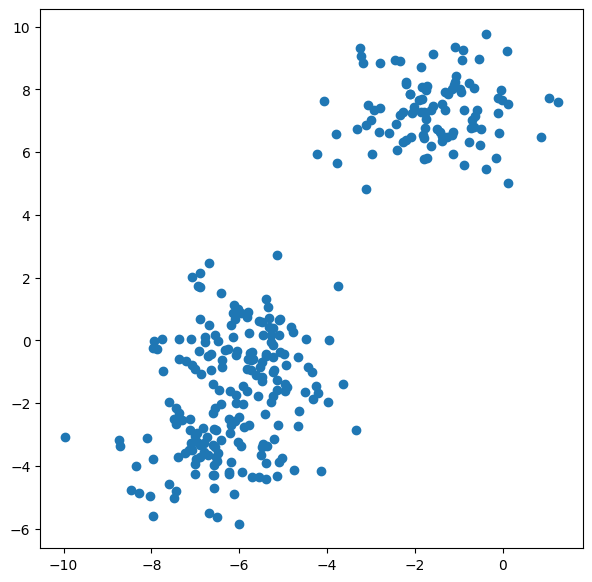

In [94]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])

### K-Means++

In [95]:
from scipy.spatial.distance import cdist

In [96]:
from sklearn.cluster import KMeans as KMeans

k_means_optimal = GridSearchCV(KMeans(), 
                                             {'n_clusters': np.arange(2, 3, 1),
                                              'init': ["k-means++", "random"],
                                              'n_init' : np.arange(1, 11, 1),
                                              'max_iter' : np.arange(1, 10, 1)
                                              },
                                              scoring='rand_score'
                                              ).fit(X, y)

In [97]:
k_means_optimal.best_estimator_

KMeans(max_iter=1, n_clusters=2, n_init=1)

In [98]:
k_means_optimal.best_params_

{'init': 'k-means++', 'max_iter': 1, 'n_clusters': 2, 'n_init': 1}

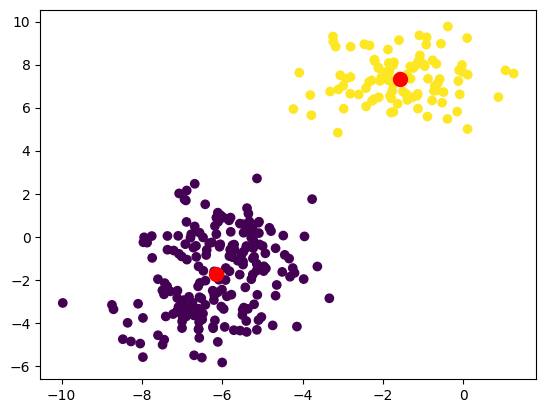

In [99]:
plt.scatter(X[:,0], X[:,1], c=k_means_optimal.best_estimator_.labels_)
plt.scatter(k_means_optimal.best_estimator_.cluster_centers_[:,0], k_means_optimal.best_estimator_.cluster_centers_[:,1], s=100, c='red')

### Metrics

In [100]:
from sklearn.metrics.cluster import rand_score

rand_score(k_means_optimal.best_estimator_.labels_, y)

0.7770345596432553

In [101]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(k_means_optimal.best_estimator_.labels_, y)

0.5697841726618705

In [102]:
from sklearn.metrics import silhouette_score

silhouette_score(X, k_means_optimal.best_estimator_.labels_)

0.7561919106274947

In [103]:
from sklearn.metrics.cluster import davies_bouldin_score
davies_bouldin_score(X, k_means_optimal.best_estimator_.labels_)

0.3246198035550335

### Affinity propagation

In [104]:
from sklearn.metrics import silhouette_score

In [105]:
from sklearn.cluster import AffinityPropagation
from sklearn.model_selection import GridSearchCV

param_grid = {
    'damping': [0.5, 0.6, 0.7, 0.8, 0.9],
    'max_iter': [50, 100, 200, 300, 400, 500],
    'preference': [-5, -10, -15, -20],
}

model = AffinityPropagation()

grid_search = GridSearchCV(model, param_grid, scoring=silhouette_score)

grid_search.fit(X)

print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
print(grid_search.best_params_)

# optimal_params = {'damping': 0.6, 'max_iter': 200, 'preference': -10}

# model = AffinityPropagation(**optimal_params)

# model.fit(X)

# clusters = model.predict(X)

d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 212, in silhouette_samples
    X, labels = check_X_y(X, labels, accept_sparse=["csc", "csr"])
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\utils\validatio

Best parameter (CV score=nan):
{'damping': 0.5, 'max_iter': 50, 'preference': -5}


d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 212, in silhouette_samples
    X, labels = check_X_y(X, labels, accept_sparse=["csc", "csr"])
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\utils\validatio

{0, 1, 2, 3, 4, 5, 6}
0.5937643172366588


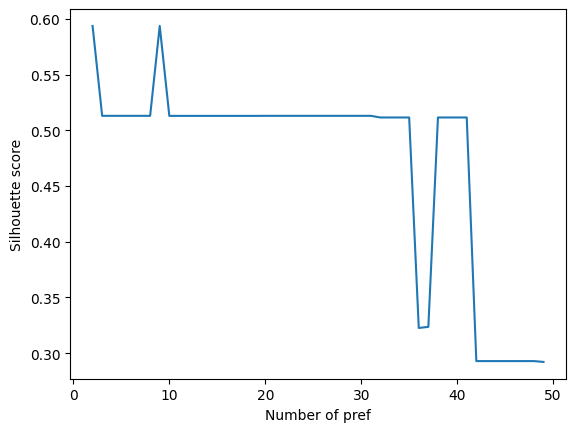

-98


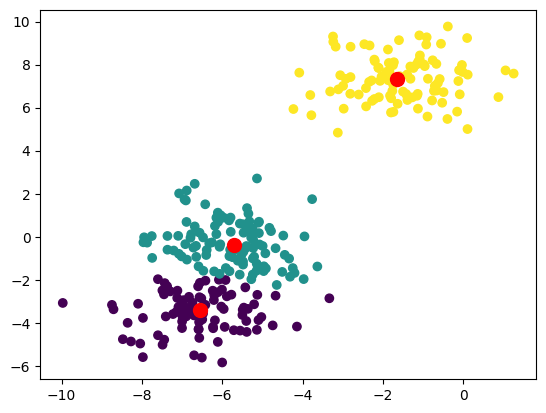

In [106]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
XX, yy = make_blobs(n_samples=300, random_state=22) 

ap = AffinityPropagation(damping=0.9, preference=-42).fit(XX)
ss = []
pp =[]
# Получаем метки кластеров для исходной модели
labels = ap.labels_
print(set(labels))
# Изменяем параметры модели и пересчитываем метки кластеров
for i in range(2, 50):
  ap.set_params(preference=-100+i)
  ap.fit(XX)
  new_labels = ap.labels_
  # print(np.unique(new_labels))
  score = silhouette_score(XX, new_labels)
  ss.append(score)
  pp.append(-100+i)

  # Обновляем метки кластеров для следующего шага цикла
  labels = new_labels
print(max(ss))

plt.plot(range(2, 50), ss)
plt.xlabel("Number of pref")
plt.ylabel("Silhouette score")
plt.show()
print(pp[np.argmax(ss)])
ap_final = AffinityPropagation(damping=0.9, preference=pp[np.argmax(ss)]).fit(XX)

plt.scatter(XX[:,0], XX[:,1], c=ap_final.labels_)
plt.scatter(ap_final.cluster_centers_[:,0], ap_final.cluster_centers_[:,1], s=100, c='red')

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

### Metrics

In [107]:
from sklearn.metrics.cluster import rand_score

rand_score(ap_final.labels_, y)

0.9457971014492753

In [108]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(ap_final.labels_, y)

0.8777997845055489

In [109]:
from sklearn.metrics import silhouette_score

silhouette_score(X, ap_final.labels_)

0.5937643172366588

In [110]:
from sklearn.metrics.cluster import davies_bouldin_score
davies_bouldin_score(X, ap_final.labels_)

0.5882095548534835

### Dbscan

[-1  0  1  2  3  4]


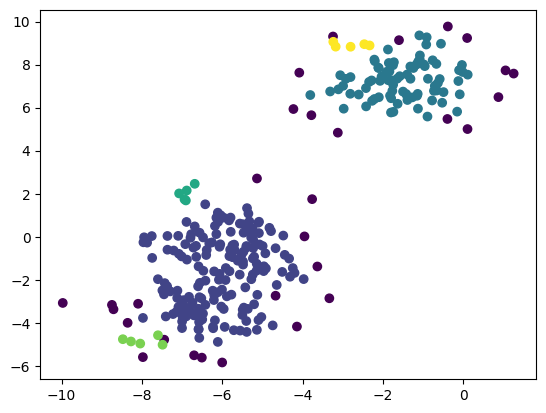

In [111]:
from sklearn.cluster import DBSCAN
import numpy as np
X, y = make_blobs(n_samples=300, random_state=22)
dbscan = DBSCAN(eps=0.6).fit(X)
print(np.unique(dbscan.labels_))
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)

[-1  0  1  2  3]
[-1  0  1  2  3  4  5  6  7]
[-1  0  1  2  3  4  5]
[-1  0  1  2]
[-1  0  1  2]
[-1  0  1  2]
[-1  0  1]
[-1  0  1]
[0 1]
[0 1]


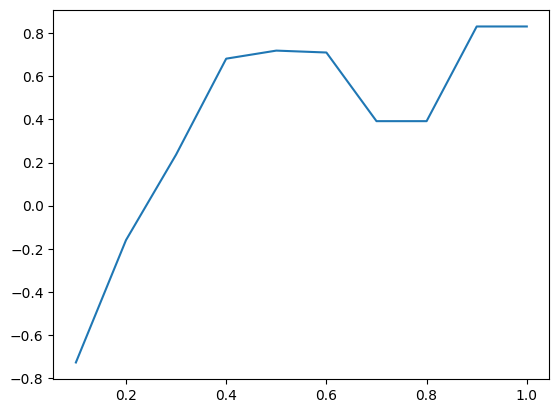

In [112]:
from sklearn.cluster import DBSCAN
import numpy as np
X_d, y_d = make_blobs(n_samples=300, random_state=22, cluster_std=0.5)
dbscan = DBSCAN(eps=0.6).fit(X_d)
labels = dbscan.labels_
sscore = []
ii = []
eps =  np.linspace(0.1, 1, 10)
for i in eps:
    dbscan.set_params(eps=i)
    dbscan.fit(X_d)
    new_labels = dbscan.labels_
    print(np.unique(new_labels))
    score = silhouette_score(X_d, new_labels)
    sscore.append(score)
    ii.append(i)
    labels = new_labels
  

plt.plot(eps, sscore)

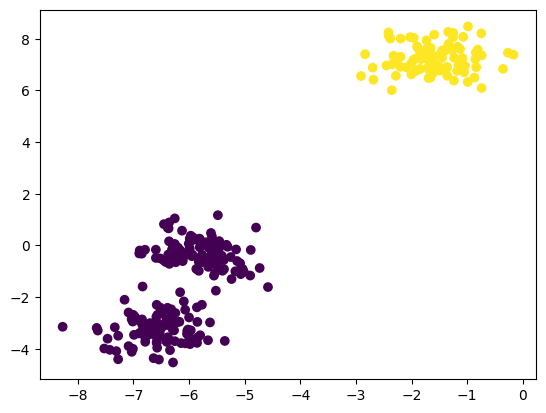

In [113]:
from sklearn.cluster import DBSCAN
import numpy as np
dbscan = DBSCAN(eps=ii[np.argmax(sscore)]).fit(X_d)
plt.scatter(X_d[:,0], X_d[:,1], c=dbscan.labels_)


### Metrics


In [114]:
from sklearn.metrics.cluster import rand_score

rand_score(dbscan.labels_, y_d)

0.7770345596432553

In [115]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(dbscan.labels_, y_d)

0.5697841726618705

In [116]:
from sklearn.metrics import silhouette_score

silhouette_score(X_d, dbscan.labels_)

0.8313140028971283

In [117]:
from sklearn.metrics.cluster import rand_score

rand_score(dbscan.labels_, y_d)

0.7770345596432553

### Gaussian Mixtures

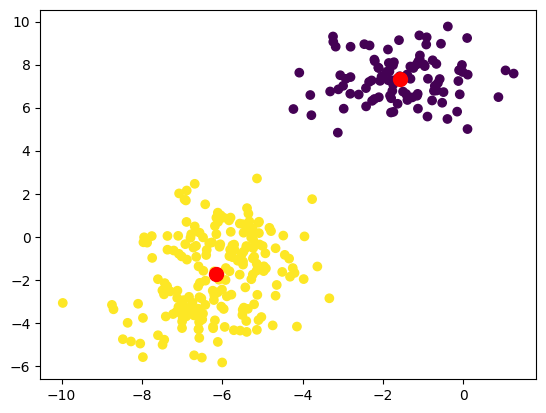

In [118]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2).fit(X)

gm.predict(X)

plt.scatter(X[:,0], X[:,1], c=gm.predict(X))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

In [119]:
from sklearn.mixture import GaussianMixture
X, y = make_blobs(n_samples=300, random_state=22, cluster_std=0.5)
param_grid = {
    'n_components': [2, 3, 4, 5],
    'covariance_type': ['full', 'tied', 'diag', 'spherical']
}
gm = GaussianMixture()
grid_search = GridSearchCV(gm, param_grid=param_grid, cv=5)
grid_search.fit(X)
print(grid_search.best_params_)

{'covariance_type': 'tied', 'n_components': 3}


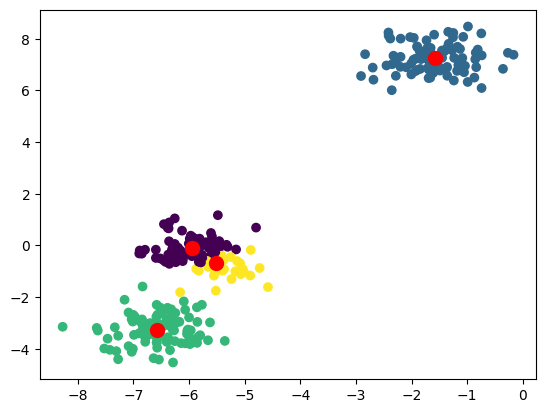

In [123]:
gm = GaussianMixture(n_components=4, covariance_type="tied").fit(X)
pred = gm.predict(X)
plt.scatter(X[:,0], X[:,1], c=gm.predict(X))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

### Metrics

In [124]:
from sklearn.metrics.cluster import rand_score

rand_score(pred, y)

0.9532441471571906

In [125]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(pred, y)

0.890645185088679

In [126]:
from sklearn.metrics import silhouette_score

silhouette_score(X, pred)

0.6302958101838434

In [127]:
from sklearn.metrics.cluster import davies_bouldin_score
davies_bouldin_score(X, pred)

0.6058949944993037

### Иерархическая кластеризация

In [128]:
from scipy.cluster import hierarchy

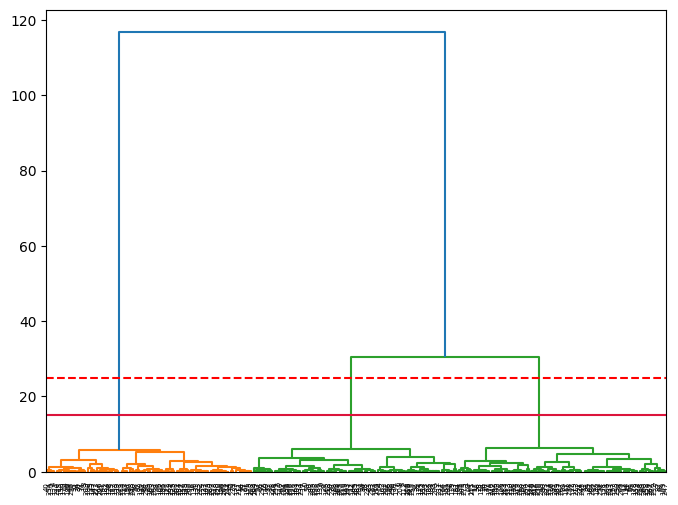

In [129]:
clusters = hierarchy.linkage(X, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(25, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(15, color='crimson');

In [130]:
from sklearn.cluster import AgglomerativeClustering

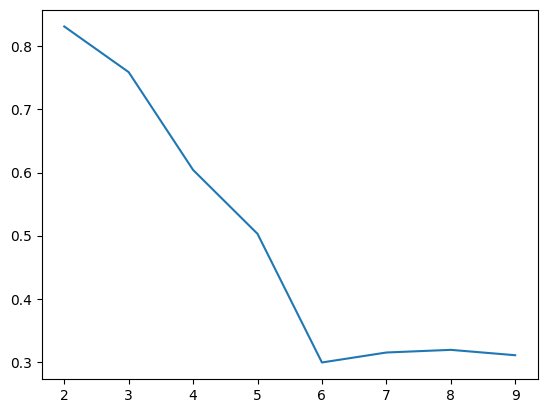

In [131]:
from sklearn.metrics import silhouette_score

ss = []
ii = []

for i in range(2, 10):
  ss.append(silhouette_score(X, AgglomerativeClustering(i).fit(X).labels_))
  ii.append(i)

plt.plot(range(2,10), ss)

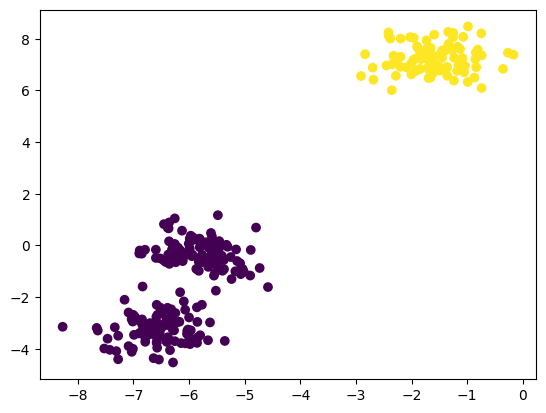

In [132]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=ii[np.argmax(ss)], linkage="ward").fit(X)
plt.scatter(X[:,0], X[:,1], c=clustering.labels_)

### Metrics

In [133]:
from sklearn.metrics.cluster import rand_score

rand_score(clustering.labels_, y)

0.7770345596432553

In [134]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(clustering.labels_, y)

0.5697841726618705

In [135]:
from sklearn.metrics import silhouette_score

silhouette_score(X, clustering.labels_)

0.8313140028971283

In [136]:
from sklearn.metrics.cluster import davies_bouldin_score
davies_bouldin_score(X, clustering.labels_)

0.22559144711899834

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
ac = AgglomerativeClustering()
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],
    'linkage': ['ward', 'complete', 'average']
}
grid_search = GridSearchCV(ac, param_grid=param_grid, cv=5, scoring=silhouette_score)
grid_search.fit(X)
print(grid_search.best_params_)

d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 212, in silhouette_samples
    X, labels = check_X_y(X, labels, accept_sparse=["csc", "csr"])
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\utils\validatio

{'linkage': 'ward', 'n_clusters': 2}


d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 212, in silhouette_samples
    X, labels = check_X_y(X, labels, accept_sparse=["csc", "csr"])
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "d:\Machine_Learning\ML\venv\lib\site-packages\sklearn\utils\validatio

## SOM

In [137]:
from sklearn_som.som import SOM
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn_som.som import SOM

param_grid = {
    'm': [5, 10, 15],
    'n': [5, 10, 15],
    'learning_rate': [0.01, 0.1],
    'sigma': [0.3, 0.5],
}

som = SOM(dim=2)
grid_search = GridSearchCV(som, param_grid=param_grid, cv=5, scoring=silhouette_score)
grid_search.fit(X)
print(grid_search.best_params_)

TypeError: Cannot clone object '<sklearn_som.som.SOM object at 0x0000017B49CEB250>' (type <class 'sklearn_som.som.SOM'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [138]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(X)

In [139]:
predictions = iris_som.predict(X)

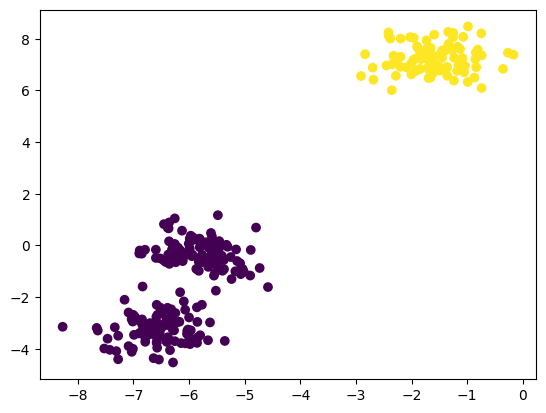

In [140]:
plt.scatter(X[:, 0], X[:, 1], c=predictions)
plt.show()

### Metrics

In [146]:
from sklearn.metrics.cluster import rand_score

rand_score(y, predictions)

0.7770345596432553

In [143]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(predictions, y)

0.5697841726618705

In [144]:
from sklearn.metrics import silhouette_score

silhouette_score(X, predictions)

0.8313140028971283

In [145]:
from sklearn.metrics.cluster import davies_bouldin_score
davies_bouldin_score(X, predictions)

0.22559144711899834